<a href="https://colab.research.google.com/github/MKastek/time-series-notes/blob/main/cost_of_heating_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Input data

In [3]:
data_string = """
invoice issue date,cost of heating
11.2018,65
12.2018,91
1.2019,128
2.2019,123
3.2019,71
4.2019,22
5.2019,10
6.2019,5
7.2019,7
8.2019,8
9.2019,8
10.2019,24
2019-11-11,263
12.2019,385
1.2020,485
2.2020,455
3.2020,534
4.2020,328
5.2020,266
6.2020,281
7.2020,297
8.2020,307
9.2020,341
10.2020,365
11.2020,1225
12.2020,1377
1.2021,1373
2.2021,1153
2021-03-08,1209
4.2021,701
5.2021,569
6.2021,585
7.2021,625
8.2021,699
9.2021,730
10.2021,743
2021-11-09,1765
12.2021,1872
1/2022,1840
2/2022,1704
3/2022,2313
4/2022,1952
5/2022,1755
6/2022,979
7/2022,1271
8/2022,1384
9/2022,1360
10/2022,1363
11/2022,2719
12/2022,2961
"""

### Read Dataframe  
Invoise issue date is in different formats eg. `11.2018`, `2019-11-11`, `12/2022`. Time series ia a sequence of data points organized in time order. The sequence captures data at equally spaced points in time. Data collected irregularly is not considered a time series.  

Invoice issue date is changed to be regularly spaced - first day of month.

In [36]:
df = pd.read_csv(StringIO(data_string))

In [37]:

df

,invoice issue date,cost of heating
0,11.2018,65
1,12.2018,91
2,1.2019,128
3,2.2019,123
4,3.2019,71
5,4.2019,22
6,5.2019,10
7,6.2019,5
8,7.2019,7
9,8.2019,8


In [38]:
def clean_time_data(df: pd.DataFrame, time_column: str)-> pd.DataFrame:
  df[time_column] = df[time_column].apply(lambda x: x.replace('.','/'))
  df[time_column] = pd.to_datetime(df[time_column], errors='coerce');
  df[time_column] = df[time_column].dt.to_period('M').dt.to_timestamp()
  return df

In [39]:
df = clean_time_data(df, 'invoice issue date')

<ipython-input-38-a8ab27a19dee>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[time_column] = pd.to_datetime(df[time_column], errors='coerce');


In [40]:
df

,invoice issue date,cost of heating
0,2018-11-01,65
1,2018-12-01,91
2,2019-01-01,128
3,2019-02-01,123
4,2019-03-01,71
5,2019-04-01,22
6,2019-05-01,10
7,2019-06-01,5
8,2019-07-01,7
9,2019-08-01,8


### Time series - plot

<Axes: xlabel='invoice issue date'>

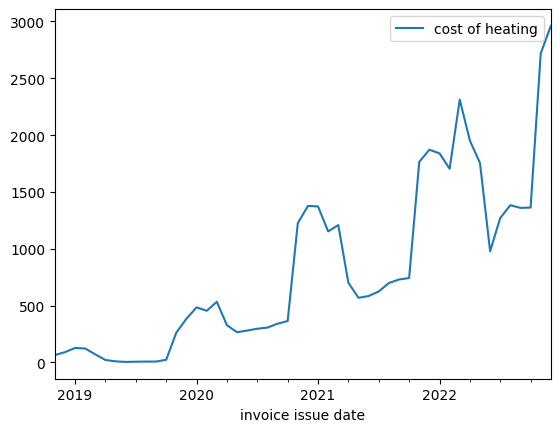

In [8]:
df.plot(x='invoice issue date', y='cost of heating')

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(x=df['cost of heating'], model='additive', period=11)

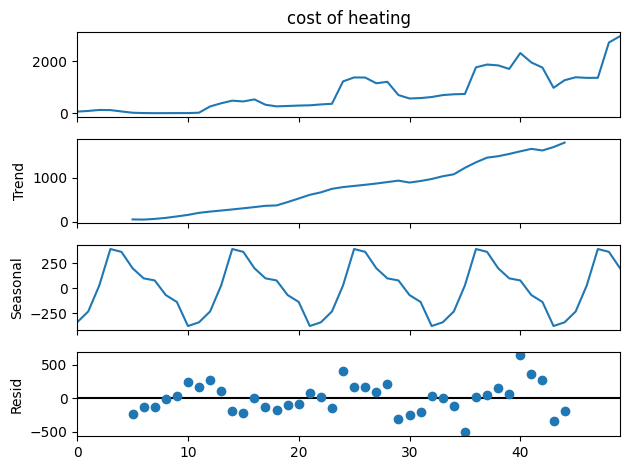

In [10]:
result.plot()
plt.show()

In [11]:
reconstructed = result.trend + result.seasonal + result.resid

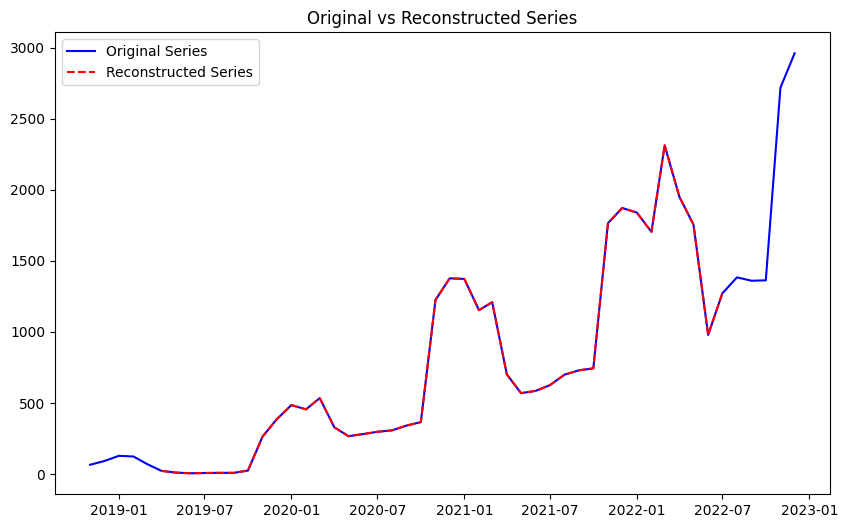

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(df['invoice issue date'],df['cost of heating'], label='Original Series', color='blue')
plt.plot(df['invoice issue date'],reconstructed, label='Reconstructed Series', color='red', linestyle='--')
plt.legend()
plt.title("Original vs Reconstructed Series")
plt.show()

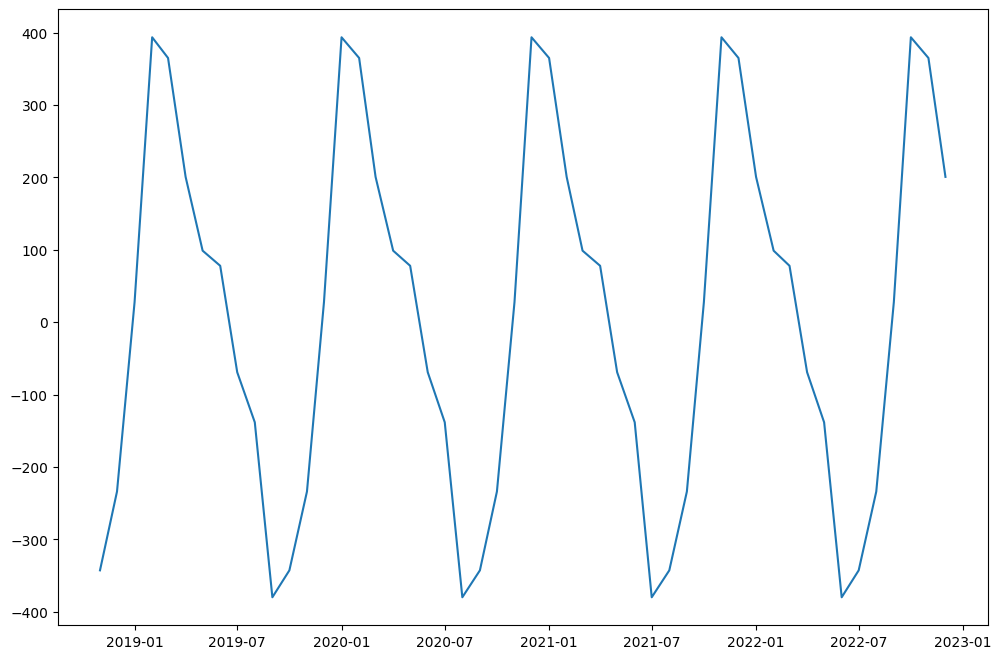

In [13]:
plt.figure(figsize=(12, 8))
plt.plot(df['invoice issue date'], result.seasonal, label='Seasonality')

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

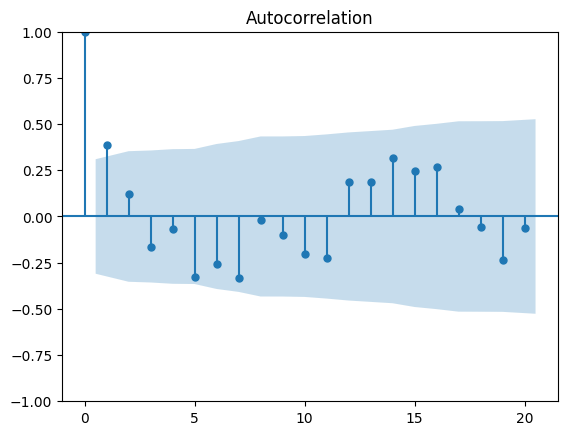

In [15]:
plot_acf(result.resid.dropna(), lags=20)
plt.show()

In [16]:
adf_result = adfuller(result.resid.dropna())
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -5.391757379701369
p-value: 3.5248764803040807e-06


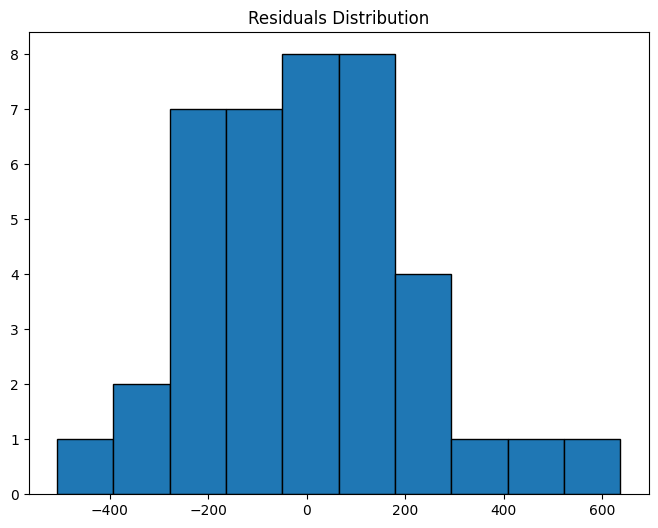

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(result.resid.dropna(), bins=10, edgecolor='black')
plt.title('Residuals Distribution')
plt.show()

In [18]:
np.mean(result.resid.dropna())

3.8450413223140103

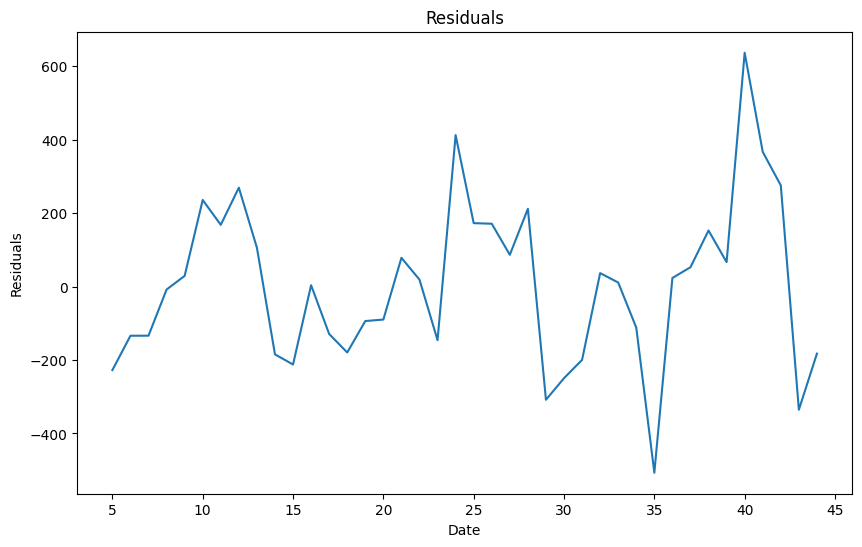

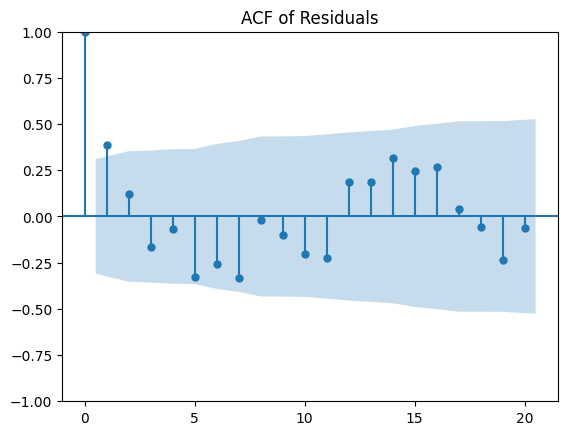

ADF Statistic: -5.391757379701369
p-value: 3.5248764803040807e-06


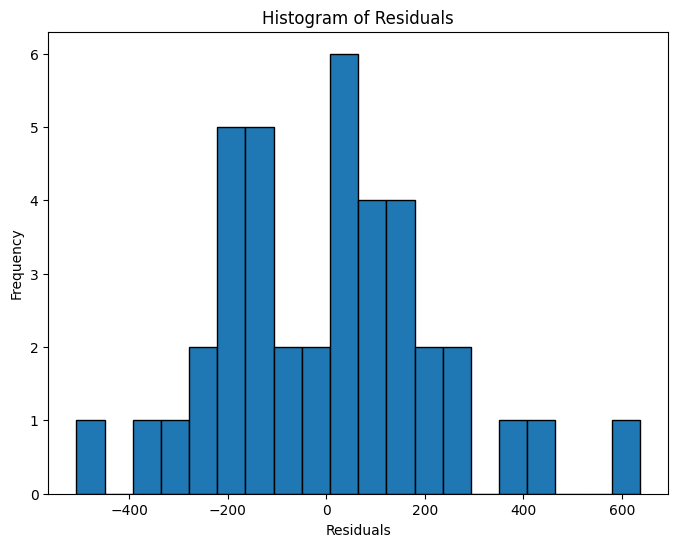

In [19]:
residuals = result.resid.dropna()
# 1. Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# 2. Plot ACF of residuals (AutoCorrelation Function)
plot_acf(residuals.dropna(), lags=20)
plt.title('ACF of Residuals')
plt.show()

# 3. Perform Augmented Dickey-Fuller test to check for stationarity
adf_result = adfuller(residuals.dropna())
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# 4. Check for normality of residuals (optional)
plt.figure(figsize=(8, 6))
plt.hist(residuals.dropna(), bins=20, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### Anomaly detection with Isolation Forest

In [21]:
from sklearn.ensemble import IsolationForest

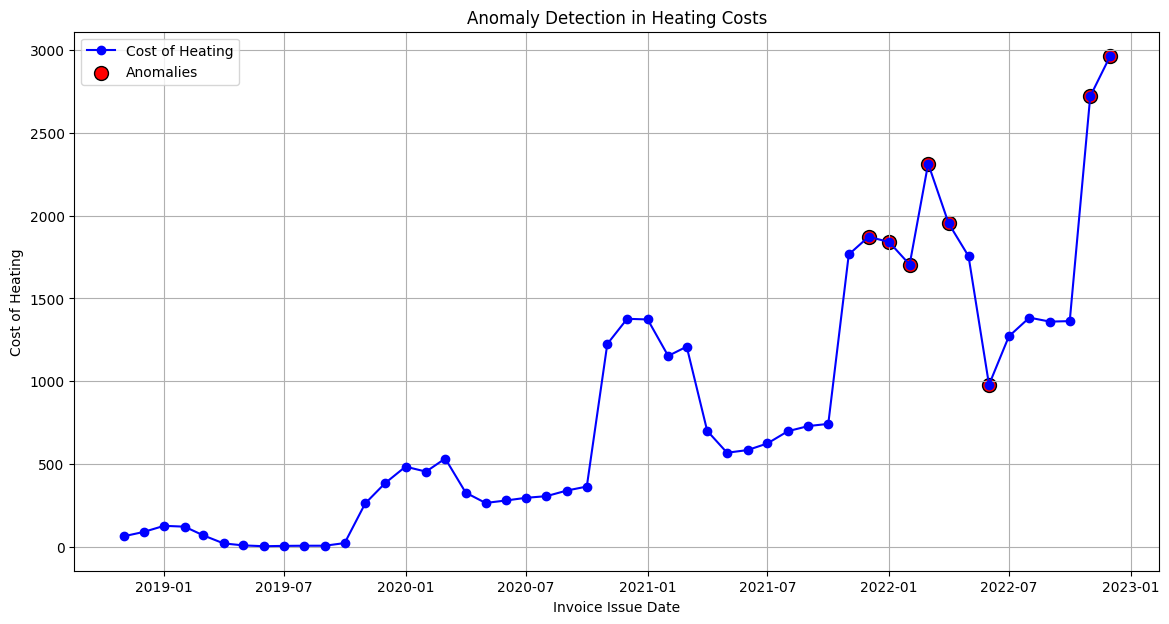

In [57]:
model = IsolationForest(random_state=42,contamination=0.15)
df['anomaly'] = model.fit_predict(df[['cost of heating']])

# Mark anomalies
df['is_anomaly'] = df['anomaly'] == -1

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(df['invoice issue date'], df['cost of heating'], label='Cost of Heating', color='blue', marker='o')
plt.scatter(df['invoice issue date'][df['is_anomaly']], df['cost of heating'][df['is_anomaly']],
            color='red', label='Anomalies', s=100, edgecolor='black')
plt.title('Anomaly Detection in Heating Costs')
plt.xlabel('Invoice Issue Date')
plt.ylabel('Cost of Heating')
plt.legend()
plt.grid()
plt.show()

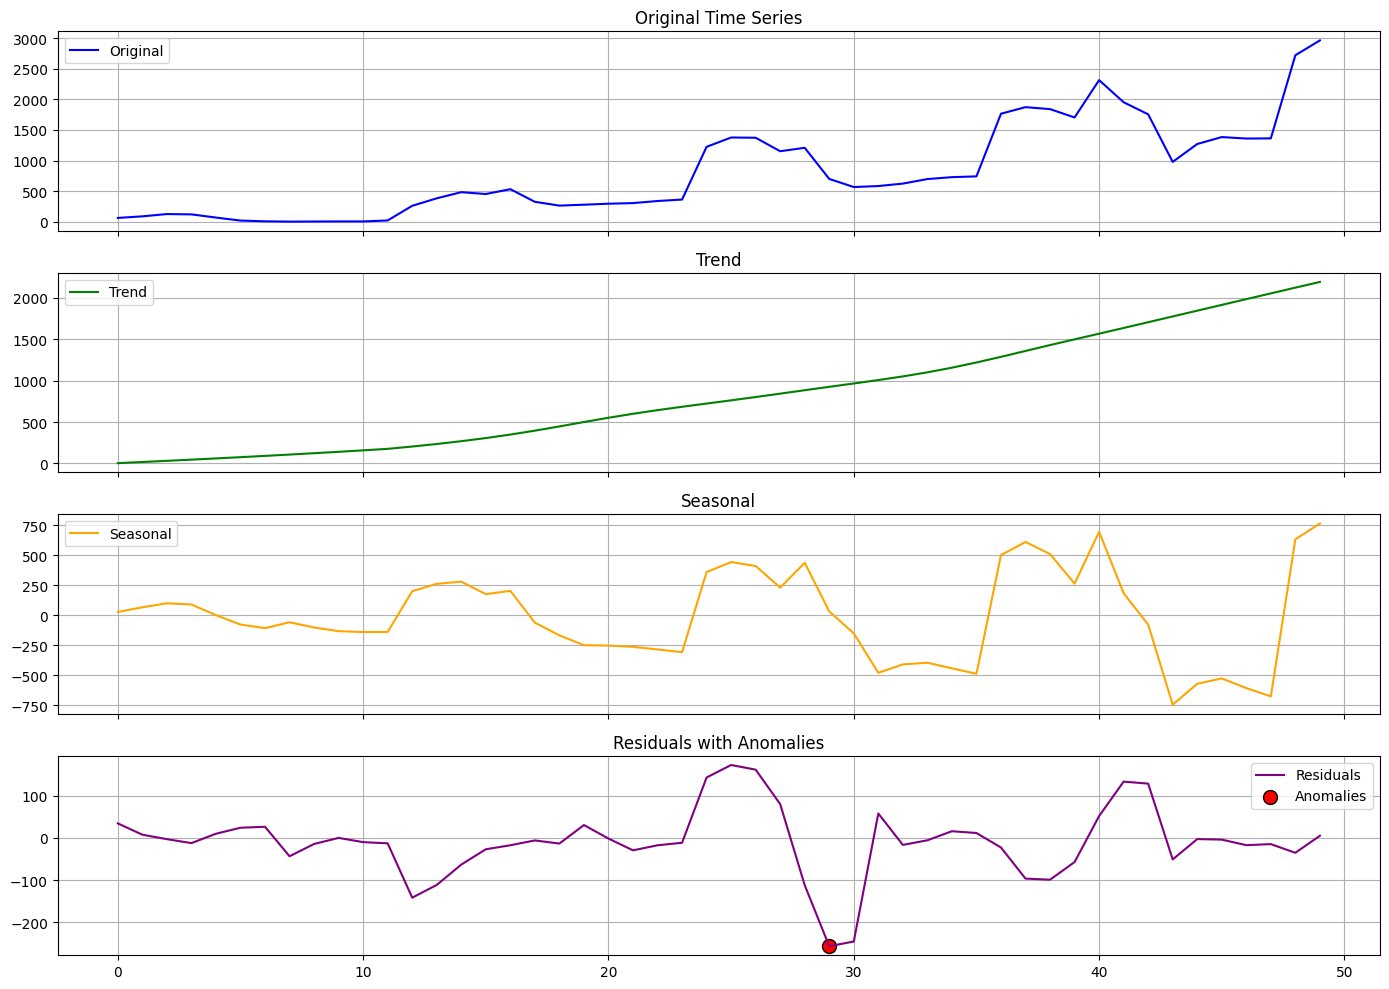

In [65]:
from statsmodels.tsa.seasonal import STL

# Decompose the time series using STL
stl = STL(df['cost of heating'], period=12)
result = stl.fit()

# Extract residuals and identify anomalies based on threshold
residuals = result.resid
threshold = 3 * residuals.std()
df['stl_anomaly'] = (abs(residuals) > threshold)

# Plot the decomposed components and anomalies
fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

# Original time series
axes[0].plot(df.index, df['cost of heating'], label='Original', color='blue')
axes[0].set_title('Original Time Series')
axes[0].grid()

# Trend
axes[1].plot(df.index, result.trend, label='Trend', color='green')
axes[1].set_title('Trend')
axes[1].grid()

# Seasonal
axes[2].plot(df.index, result.seasonal, label='Seasonal', color='orange')
axes[2].set_title('Seasonal')
axes[2].grid()

# Residuals with anomalies
axes[3].plot(df.index, residuals, label='Residuals', color='purple')
axes[3].scatter(df.index[df['stl_anomaly']], residuals[df['stl_anomaly']],
                color='red', label='Anomalies', s=100, edgecolor='black')
axes[3].set_title('Residuals with Anomalies')
axes[3].grid()

# Add legends and labels
for ax in axes:
    ax.legend()
plt.tight_layout()
plt.show()

In [66]:
np.mean(residuals)

-9.74238735561796

In [67]:
import scipy.stats as stats

In [69]:
df['z_score'] = stats.zscore(df['cost of heating'])

In [70]:
df

,invoice issue date,cost of heating,anomaly,is_anomaly,stl_anomaly,z_score
0,2018-11-01,65,1,False,False,-1.000676
1,2018-12-01,91,1,False,False,-0.966303
2,2019-01-01,128,1,False,False,-0.917388
3,2019-02-01,123,1,False,False,-0.923998
4,2019-03-01,71,1,False,False,-0.992744
5,2019-04-01,22,1,False,False,-1.057523
6,2019-05-01,10,1,False,False,-1.073388
7,2019-06-01,5,1,False,False,-1.079998
8,2019-07-01,7,1,False,False,-1.077354
9,2019-08-01,8,1,False,False,-1.076032


In [71]:
df['centered_moving_avg'] = df['cost of heating'].rolling(window=3, center=True).mean()

In [72]:
df

,invoice issue date,cost of heating,anomaly,is_anomaly,stl_anomaly,z_score,centered_moving_avg
0,2018-11-01,65,1,False,False,-1.000676,NaN
1,2018-12-01,91,1,False,False,-0.966303,94.666667
2,2019-01-01,128,1,False,False,-0.917388,114.000000
3,2019-02-01,123,1,False,False,-0.923998,107.333333
4,2019-03-01,71,1,False,False,-0.992744,72.000000
5,2019-04-01,22,1,False,False,-1.057523,34.333333
6,2019-05-01,10,1,False,False,-1.073388,12.333333
7,2019-06-01,5,1,False,False,-1.079998,7.333333
8,2019-07-01,7,1,False,False,-1.077354,6.666667
9,2019-08-01,8,1,False,False,-1.076032,7.666667


In [76]:
df['weighted_moving_avg'] = df['cost of heating'].ewm(span=3).mean()

In [79]:
df['deviation'] = abs(df['cost of heating'] - df['weighted_moving_avg'])

In [80]:
df['z_score_devation'] = stats.zscore(df['deviation'])

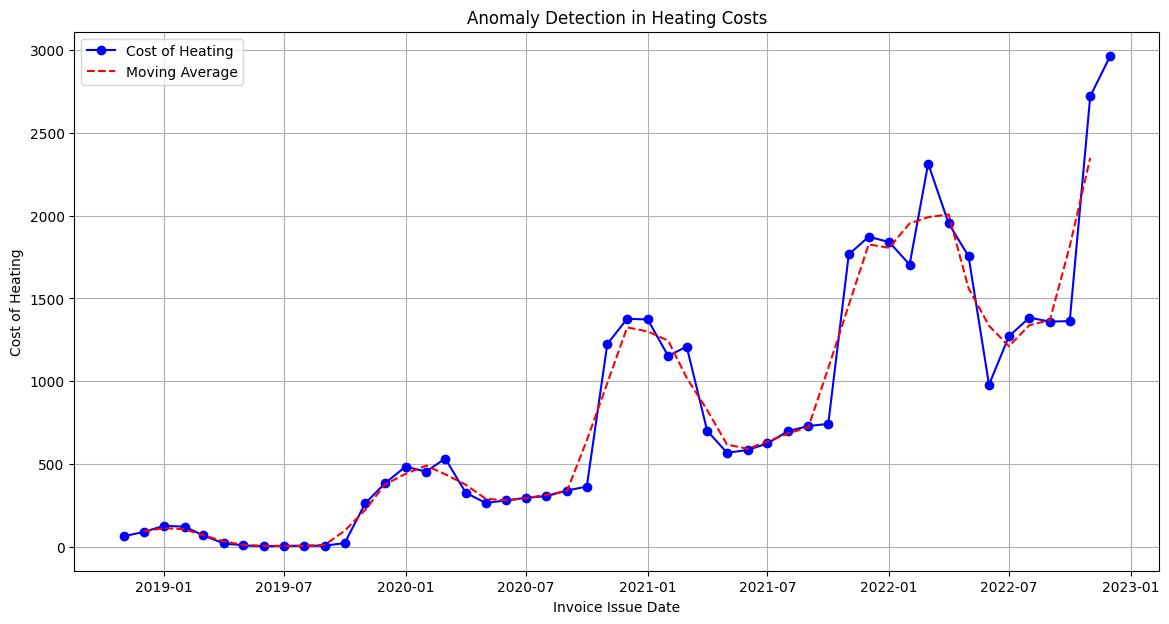

In [78]:
plt.figure(figsize=(14, 7))
plt.plot(df['invoice issue date'], df['cost of heating'], label='Cost of Heating', color='blue', marker='o')
plt.plot(df['invoice issue date'], df['centered_moving_avg'], label='Moving Average', color='red', linestyle='--')
plt.title('Anomaly Detection in Heating Costs')
plt.xlabel('Invoice Issue Date')
plt.ylabel('Cost of Heating')
plt.legend()
plt.grid()
plt.show()

In [81]:
df

,invoice issue date,cost of heating,anomaly,is_anomaly,stl_anomaly,z_score,centered_moving_avg,weighted_moving_avg,deviation,z_score_devation
0,2018-11-01,65,1,False,False,-1.000676,NaN,65.000000,0.000000,-0.693310
1,2018-12-01,91,1,False,False,-0.966303,94.666667,82.333333,8.666667,-0.638446
2,2019-01-01,128,1,False,False,-0.917388,114.000000,108.428571,19.571429,-0.569414
3,2019-02-01,123,1,False,False,-0.923998,107.333333,116.200000,6.800000,-0.650263
4,2019-03-01,71,1,False,False,-0.992744,72.000000,92.870968,21.870968,-0.554857
5,2019-04-01,22,1,False,False,-1.057523,34.333333,56.873016,34.873016,-0.472547
6,2019-05-01,10,1,False,False,-1.073388,12.333333,33.251969,23.251969,-0.546114
7,2019-06-01,5,1,False,False,-1.079998,7.333333,19.070588,14.070588,-0.604237
8,2019-07-01,7,1,False,False,-1.077354,6.666667,13.023483,6.023483,-0.655179
9,2019-08-01,8,1,False,False,-1.076032,7.666667,10.509286,2.509286,-0.677425


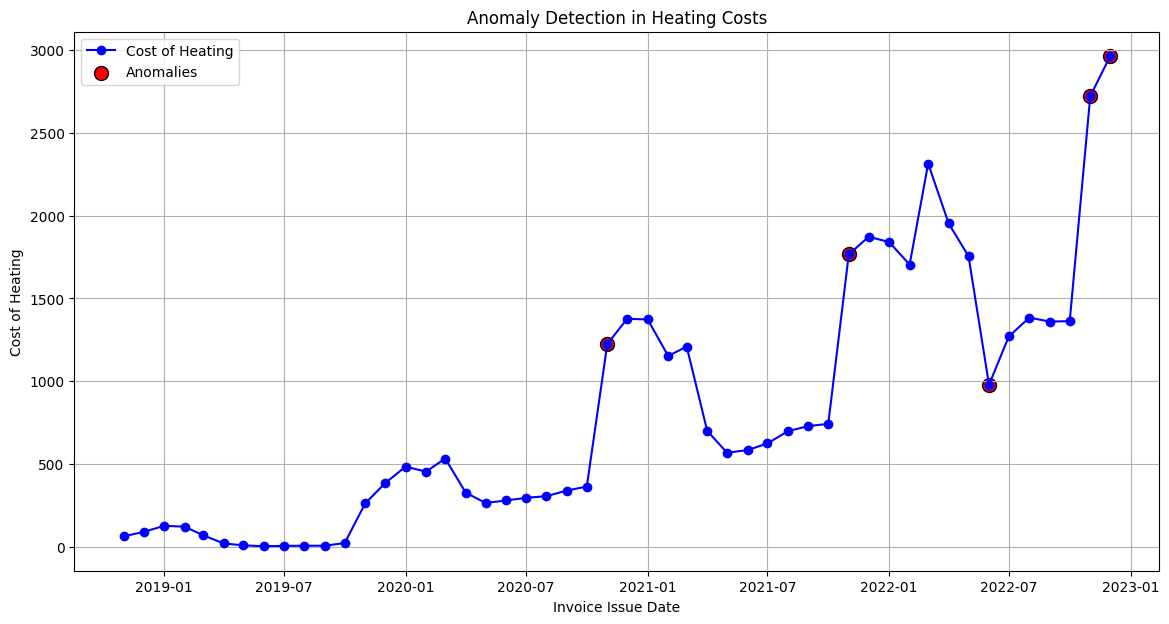

In [90]:
plt.figure(figsize=(14, 7))
plt.plot(df['invoice issue date'], df['cost of heating'], label='Cost of Heating', color='blue', marker='o')
plt.scatter(df['invoice issue date'][np.abs(df['z_score_devation']) > 2 ], df['cost of heating'][np.abs(df['z_score_devation']) > 2],
            color='red', label='Anomalies', s=100, edgecolor='black')
plt.title('Anomaly Detection in Heating Costs')
plt.xlabel('Invoice Issue Date')
plt.ylabel('Cost of Heating')
plt.legend()
plt.grid()
plt.show()